In [10]:
!pip install tensorflow librosa numpy scikit-learn


In [11]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os


In [12]:
# Define the path to your dataset
data_path = "D:\\speech_emotion_recognition\\archive"


def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

features = []
labels = []


emotion_map = {
    '01': 0,  # neutral
    '02': 1,  # calm
    '03': 2,  # happy
    '04': 3,  # sad
    '05': 4,  # angry
    '06': 5,  # fearful
    '07': 6,  # disgust
    '08': 7   # surprised
}

# Traverse the dataset directories
for actor in os.listdir(data_path):
    actor_path = os.path.join(data_path, actor)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith(".wav"):
                # Get the emotion label from the filename (e.g., '03-01-01-01-02-02-01.wav')
                emotion_label = emotion_map[file_name.split('-')[2]]  # Extracting the emotion code
                audio_path = os.path.join(actor_path, file_name)
                
                # Extract features
                features.append(extract_features(audio_path))
                labels.append(emotion_label)

# Convert to numpy arrays
X = np.array(features)
y = to_categorical(labels)

# Print the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Features shape: (1440, 13)
Labels shape: (1440, 8)


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Define and compile the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=850, validation_split=0.2)


Epoch 1/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1251 - loss: 35.0595 - val_accuracy: 0.1169 - val_loss: 6.4552
Epoch 2/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1208 - loss: 4.7529 - val_accuracy: 0.1515 - val_loss: 3.2318
Epoch 3/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1738 - loss: 2.9124 - val_accuracy: 0.1905 - val_loss: 2.4378
Epoch 4/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1800 - loss: 2.3877 - val_accuracy: 0.1818 - val_loss: 2.4273
Epoch 5/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1950 - loss: 2.3599 - val_accuracy: 0.2121 - val_loss: 2.6312
Epoch 6/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2149 - loss: 2.2863 - val_accuracy: 0.2121 - val_loss: 2.6590
Epoch 7/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2162 - loss: 2.6505 - val_accuracy: 0.2424 - val_loss: 2.1247
Epoch 8/850
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2541 - loss: 2.0489 - val_accuracy: 0.1861 -

In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save the trained model
model.save("emotion_model.h5")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 3.4117 


Test Loss: 3.242819309234619, Test Accuracy: 0.5


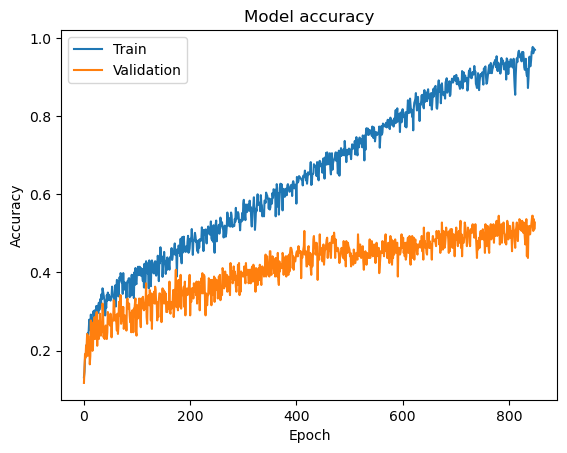

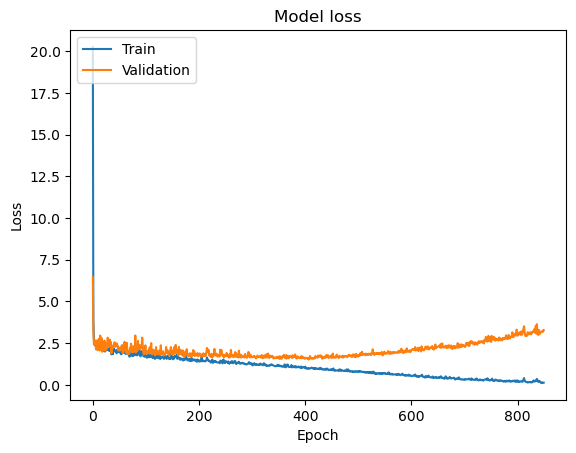

In [23]:
# Plot training & validation accuracy values

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [24]:
# Load the trained model
from tensorflow.keras.models import load_model

model = load_model("emotion_model.h5")

# Define a function to predict emotion from an audio file
def predict_emotion(audio_path):
    features = extract_features(audio_path)
    features = features.reshape(1, -1)  # Reshape for prediction
    prediction = model.predict(features)
    emotion_label = np.argmax(prediction)  # Get the predicted emotion label
    return emotion_label

# Test with a new audio file (replace with actual file path)
test_audio_path = "D:\\speech_emotion_recognition\\archive\\Actor_01\\03-01-01-01-02-02-01.wav"  # Example path
predicted_emotion = predict_emotion(test_audio_path)
print(f"Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Emotion: 0
